In [1]:
import pandas as pd 
df = pd.read_csv('churn.csv')

In [2]:
df.shape

(7043, 21)

In [3]:
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [8]:
df.shape

(7043, 21)

In [9]:
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(7032, 21)

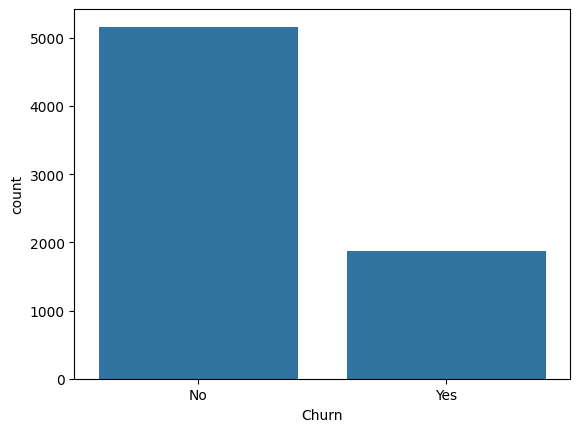

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn',data=df)
plt.show()

<Axes: xlabel='Contract', ylabel='count'>

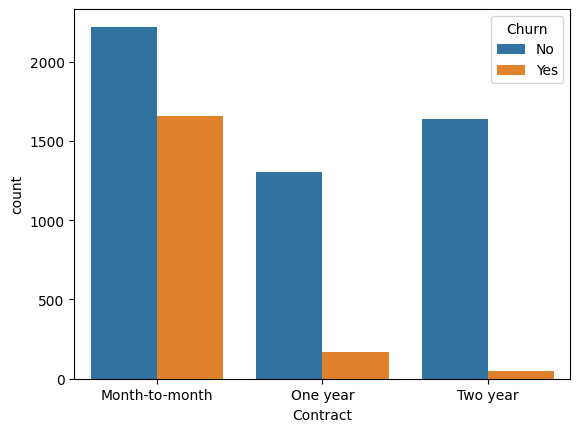

In [13]:
sns.countplot(x='Contract',hue='Churn',data=df)

<Axes: xlabel='SeniorCitizen', ylabel='count'>

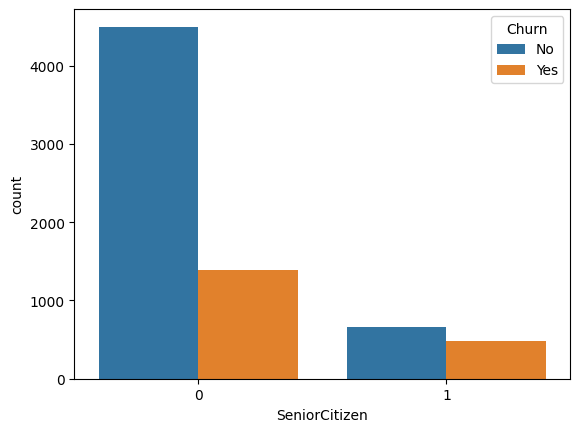

In [14]:
sns.countplot(x='SeniorCitizen',hue='Churn',data=df)

<Axes: xlabel='InternetService', ylabel='count'>

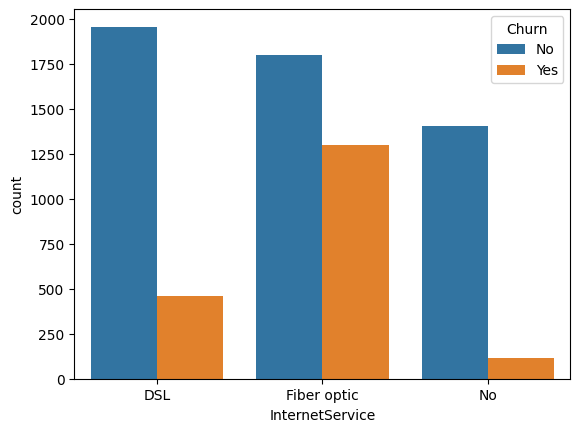

In [15]:
sns.countplot(x='InternetService',hue='Churn',data=df)

<Axes: xlabel='PaymentMethod', ylabel='count'>

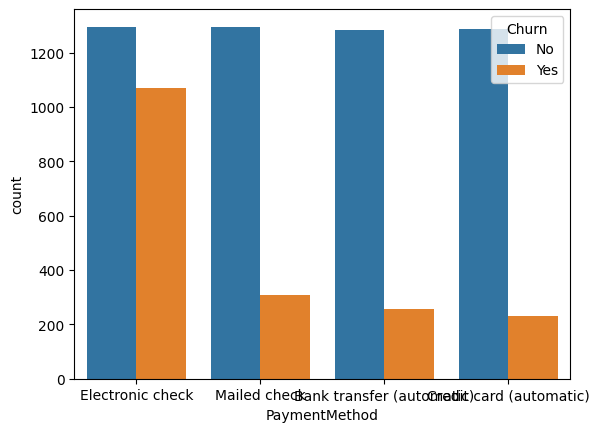

In [16]:
sns.countplot(x='PaymentMethod',hue='Churn',data=df)

Text(0.5, 1.0, 'Feature Correlation')

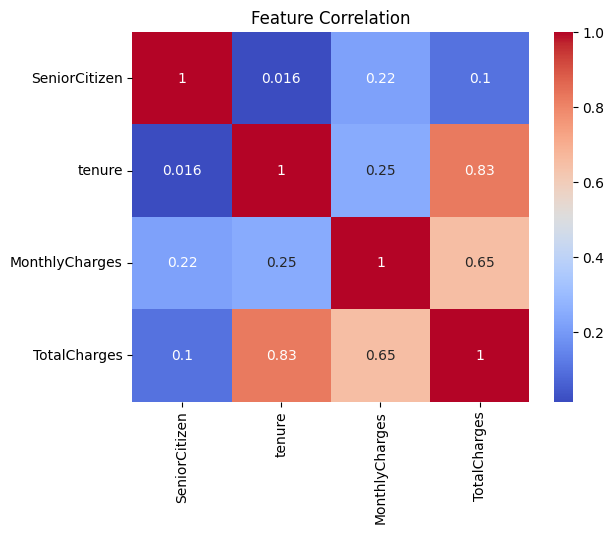

In [17]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")


In [18]:
df=pd.get_dummies(df,drop_first=True)

In [19]:
df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'customerID_0003-MKNFE', 'customerID_0004-TLHLJ',
       'customerID_0011-IGKFF', 'customerID_0013-EXCHZ',
       'customerID_0013-MHZWF', 'customerID_0013-SMEOE',
       ...
       'StreamingTV_Yes', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object', length=7062)

In [20]:
X = df.drop(columns=['Churn_Yes'])
y = df['Churn_Yes']

In [21]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.20,random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

model = LogisticRegression(max_iter=1000)
model.fit(xtrain,ytrain)

c:\Users\kaila\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [23]:
ypred = model.predict(xtest)

In [24]:
# Accuracy
print("Accuracy:", accuracy_score(ytest, ypred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(ytest, ypred))

# Detailed classification report
print("Classification Report:\n", classification_report(ytest, ypred))


Accuracy: 0.7867803837953091
Confusion Matrix:
 [[902 131]
 [169 205]]
Classification Report:
               precision    recall  f1-score   support

       False       0.84      0.87      0.86      1033
        True       0.61      0.55      0.58       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



In [25]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(xtrain, ytrain)

RandomForestClassifier()

In [26]:
ypred2 = model2.predict(xtest)

In [32]:
accuracy_score(ytest,ypred2)


0.7867803837953091

In [34]:
print("Confusion Matrix:\n", confusion_matrix(ytest,ypred2))
print("Classification Report:\n", classification_report(ytest,ypred2))


Confusion Matrix:
 [[952  81]
 [219 155]]
Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.92      0.86      1033
        True       0.66      0.41      0.51       374

    accuracy                           0.79      1407
   macro avg       0.73      0.67      0.69      1407
weighted avg       0.77      0.79      0.77      1407

